# Lab 1
DD2423 Image Analysis and Computer Vision 

## Exercise 1

### Exercise 1.3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

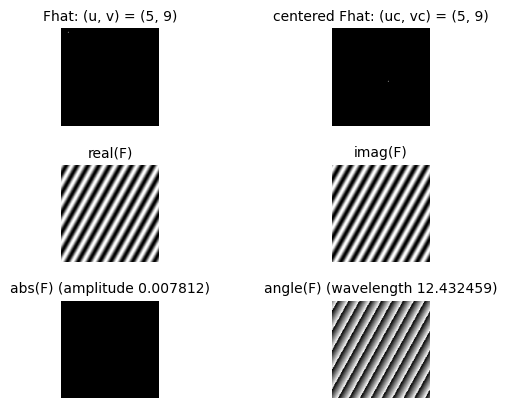

In [4]:
fftwave(5, 9)

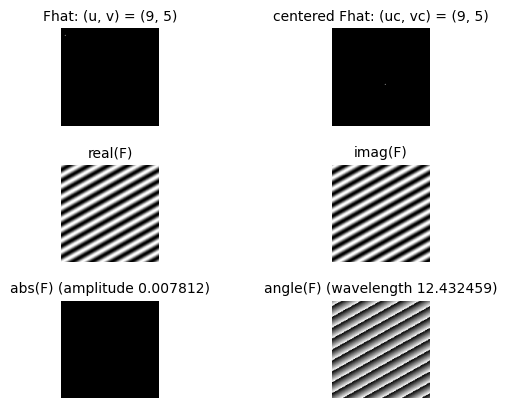

In [5]:
fftwave(9, 5)

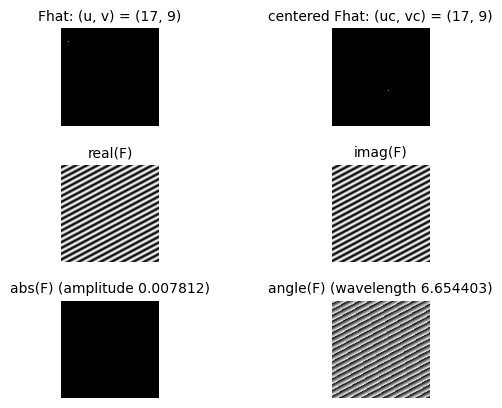

In [6]:
fftwave(17, 9)

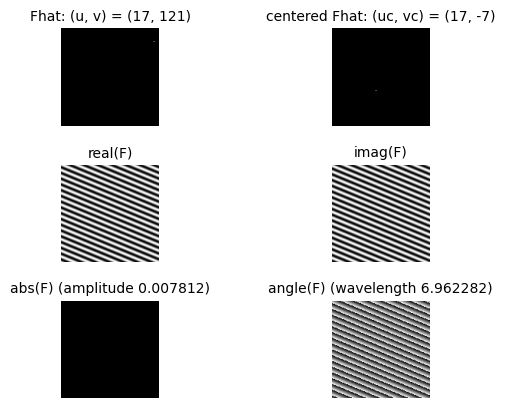

In [7]:
fftwave(17, 121)

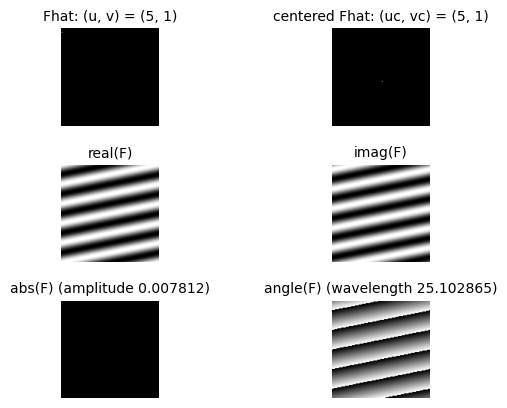

In [8]:
fftwave(5, 1)

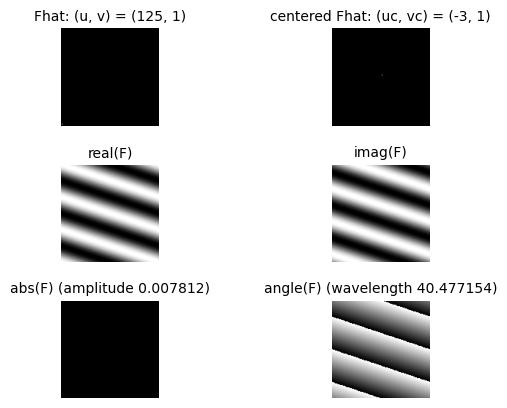

In [9]:
fftwave(125, 1)

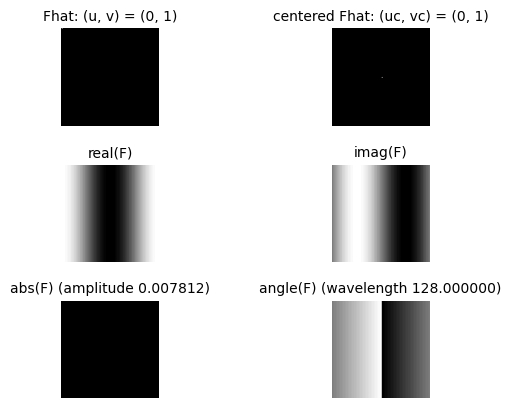

In [10]:
fftwave(0, 1)

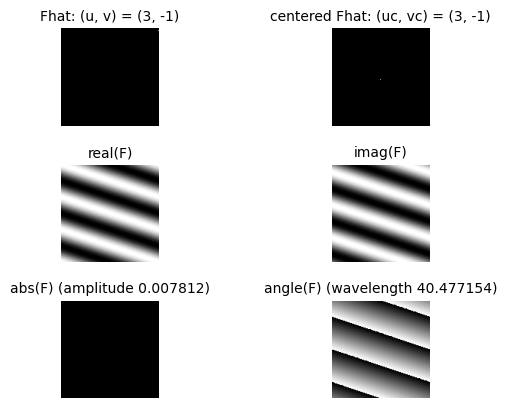

In [11]:
fftwave(3, -1)

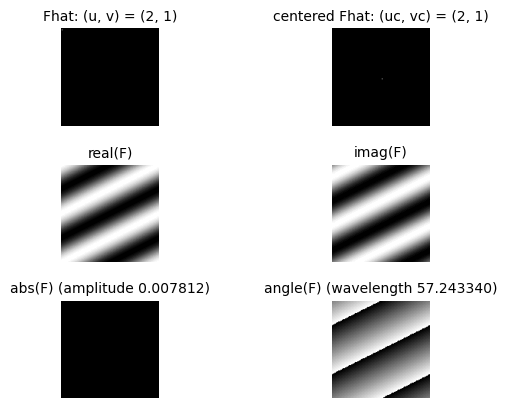

In [12]:
fftwave(2,1)

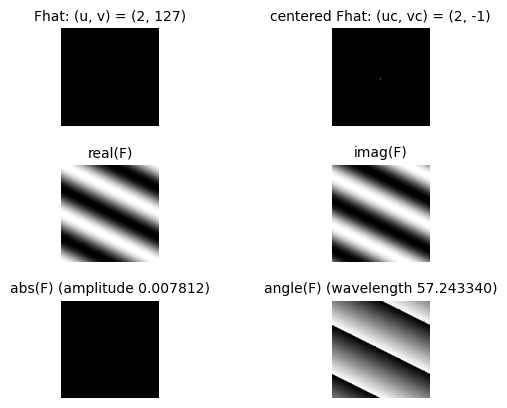

In [13]:
fftwave(2,127)

### Exercise 1.4

In [14]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

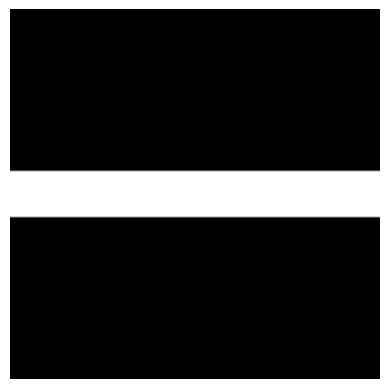

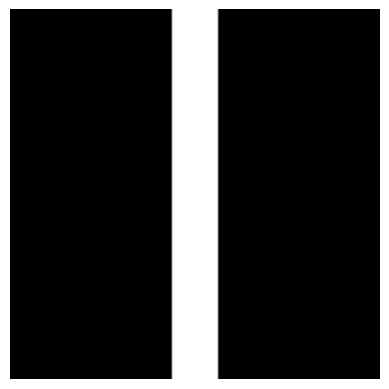

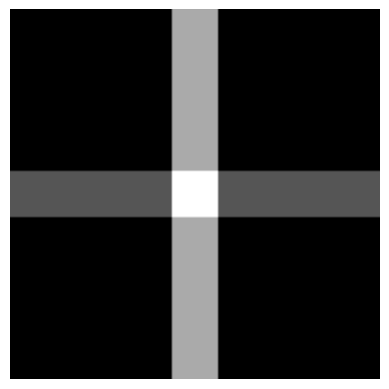

In [15]:
showgrey(F)
showgrey(G)
showgrey(H)

In [16]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

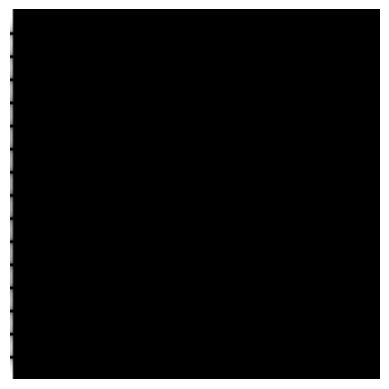

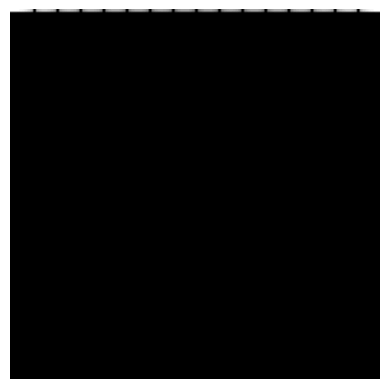

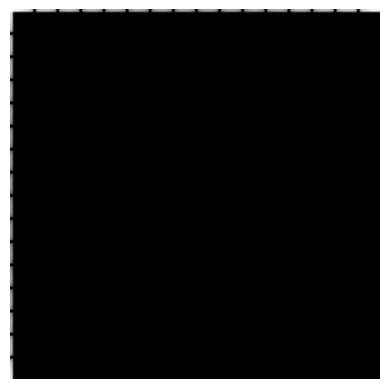

In [17]:
showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

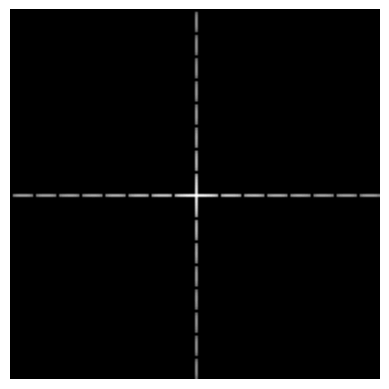

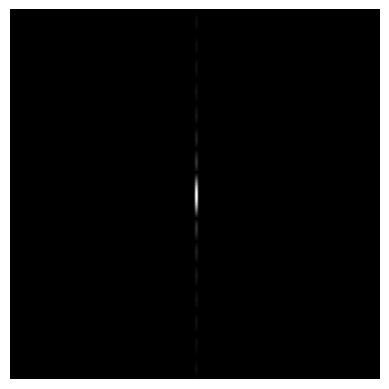

In [18]:
showgrey(np.log(1 + np.abs(fftshift(Hhat))))
showgrey(np.abs(fftshift(Fhat)))

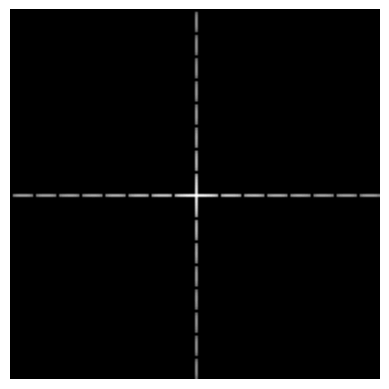

In [19]:
showfs(Hhat)

- fftshift is used so that the frequency domain is recentered around 0
- log is used so that lower coefficients (apparently exponentially decaying) are still visible.

### Exercise 1.5

In [20]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T

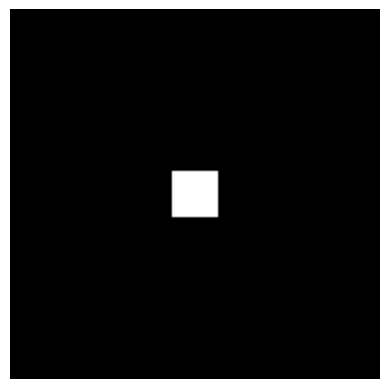

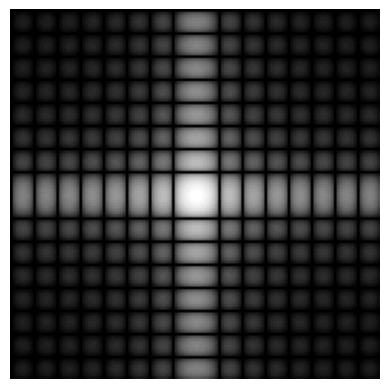

In [21]:
showgrey(F * G)
showfs(fft2(F * G))

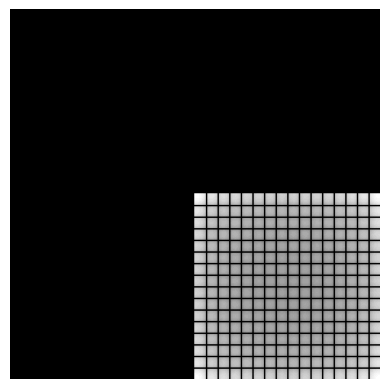

In [22]:
showfs((convolve2d((fft2(F)), (fft2(G)), 'full', 'fill')))

### Exercise 1.6 - Scaling

In [23]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
    np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)

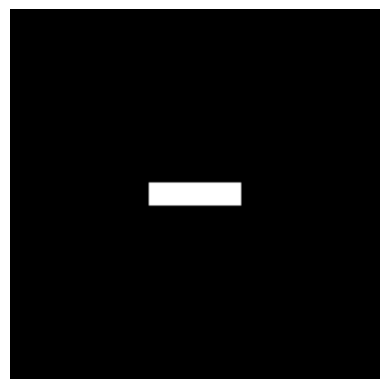

In [24]:
showgrey(F)

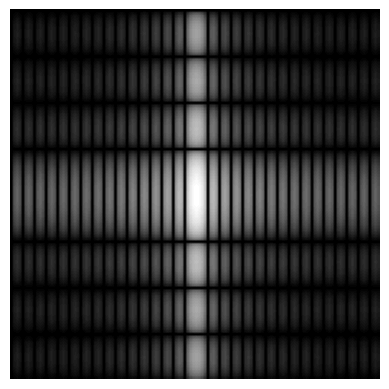

In [25]:
showfs(np.abs(fft2(F)))

### Exercise 1.7

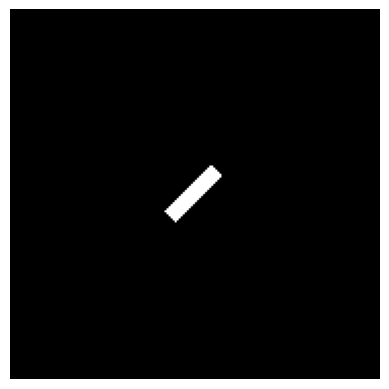

In [26]:
alpha = 45
G = rot(F, alpha)
showgrey(G)

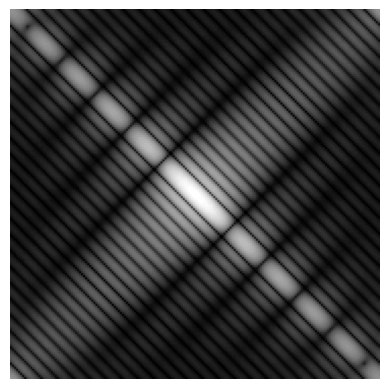

In [27]:
Ghat = fft2(G)
showfs(Ghat)

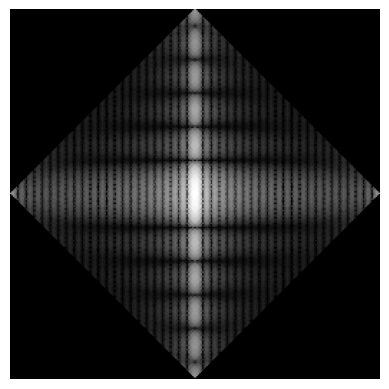

In [28]:
Hhat = rot(fftshift(Ghat), -alpha)
showgrey(np.log(1 + abs(Hhat)))

alpha =  30


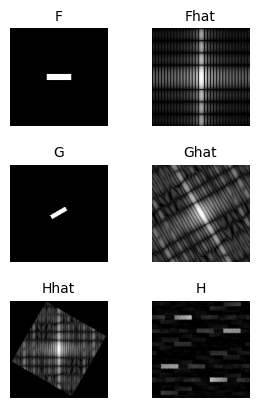

alpha =  45


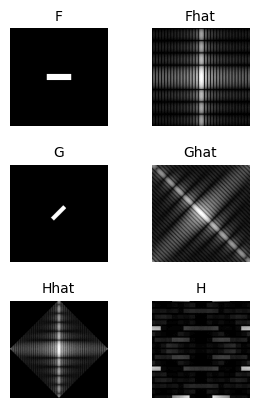

alpha =  60


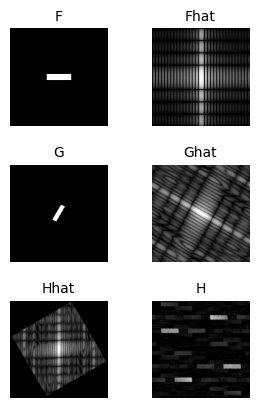

alpha =  90


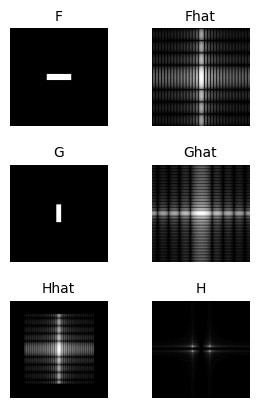

alpha =  135


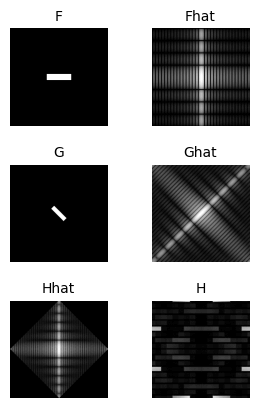

alpha =  180


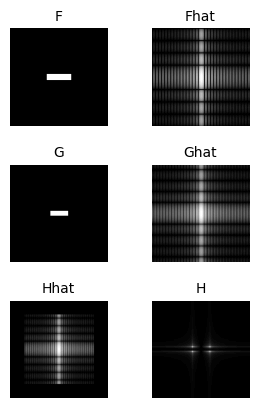

In [45]:
def fun(F, alpha):
    print("alpha = ", alpha)
    # temp = plt.clf()
    f = plt.figure()
    f.subplots_adjust(wspace=-.6, hspace=0.4)
    
    plt.rc('axes', titlesize=10)
    a1 = f.add_subplot(3, 2, 1)
    a1.set_title('F')
    showgrey(F, display=False)
    a2 = f.add_subplot(3, 2, 2)
    a2.set_title('Fhat')
    showfs(fft2(F), display=False)
    G = rot(F, alpha)
    a3 = f.add_subplot(3, 2, 3)
    a3.set_title('G')
    showgrey(G, display=False)
    a4 = f.add_subplot(3, 2, 4)
    a4.set_title('Ghat')
    Ghat = fft2(G)
    showfs(Ghat, display=False)
    Hhat = rot(fftshift(Ghat), -alpha)
    a5 = f.add_subplot(3, 2, 5)
    a5.set_title('Hhat')
    showgrey(np.log(1 + abs(Hhat)), display=False)
    H = ifft2(Hhat)
    a6 = f.add_subplot(3, 2, 6)
    a6.set_title('H')
    showgrey(np.abs(H), display)


for alpha in [30, 45, 60, 90, 135, 180]:
    fun(F, alpha)

### Exercise 1.8

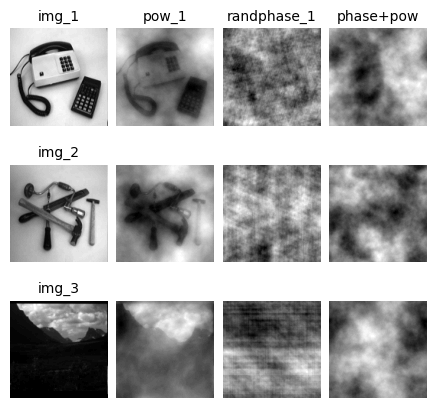

In [148]:
img_1 = np.load("Images-npy/phonecalc128.npy")
img_2 = np.load("Images-npy/few128.npy")
img_3 = np.load("Images-npy/nallo128.npy")

# Default second param a = 0.001
f = plt.figure()
f.subplots_adjust(wspace=-.4, hspace=0.4)
a = 0.001
pow_1 = pow2image(img_1, a)
pow_2 = pow2image(img_2, a)
pow_3 = pow2image(img_3, a)

a1 = f.add_subplot(3, 4, 1)
a1.set_title('img_1')
showgrey(img_1, display=False)
a2 = f.add_subplot(3, 4, 2)
a2.set_title('pow_1')
showgrey(pow_1, display=False)
a3 = f.add_subplot(3, 4, 3)
a3.set_title('randphase_1')
showgrey(randphaseimage(img_1), display=False)
a4 = f.add_subplot(3, 4, 4)
a4.set_title('phase+pow')
showgrey(randphaseimage(pow_1), display=False)

a5 = f.add_subplot(3, 4, 5)
a5.set_title('img_2')
showgrey(img_2, display=False)
a6 = f.add_subplot(3, 4, 6)
showgrey(pow_2, display=False)
a7 = f.add_subplot(3, 4, 7)
showgrey(randphaseimage(img_2), display=False)
a8 = f.add_subplot(3, 4, 8)
showgrey(randphaseimage(pow_2), display=False)

a9 = f.add_subplot(3, 4, 9)
a9.set_title('img_3')
showgrey(img_3, display=False)
a10 = f.add_subplot(3, 4, 10)
showgrey(pow_3, display=False)
a11 = f.add_subplot(3, 4, 11)
showgrey(randphaseimage(img_3), display=False)
a12 = f.add_subplot(3, 4, 12)
showgrey(randphaseimage(pow_3), display=False)

## Exericse 2

### Exercise 2.3

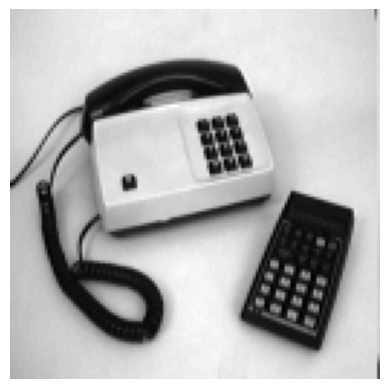

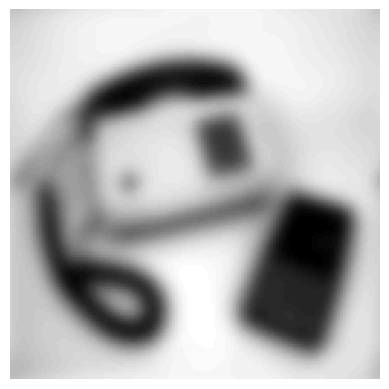

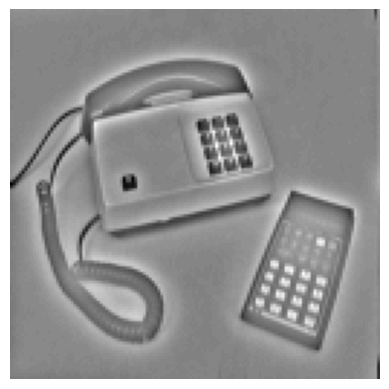

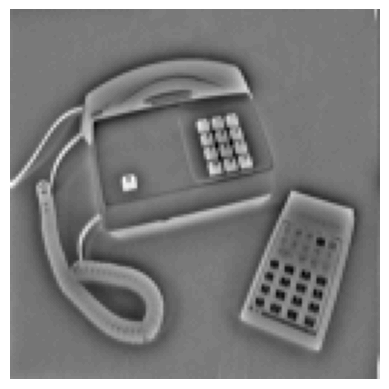

In [149]:
def gaussfft(pic, t):
    n, m = pic.shape
    mesh = np.meshgrid(np.arange(n), np.arange(m))
    # wrap around high frequencies
    mesh[0] = (mesh[0] >= n / 2) * (mesh[0] - n) + (mesh[0] < n / 2) * mesh[0]
    mesh[1] = (mesh[1] >= m / 2) * (mesh[1] - m) + (mesh[1] < m / 2) * mesh[1]
    gauss = np.exp(-(mesh[0]**2 + mesh[1]**2)/(2*t)) / (2*math.pi*t)
    # showgrey(gauss)
    gaussHat = fft2(gauss)
    # showfs(gaussHat)
    picHat = fft2(pic)
    # showfs(picHat)
    picHat_blurr = picHat * gaussHat
    # showfs(picHat_blurr)
    pic_blurr = np.real(ifft2(picHat_blurr))
    # showgrey(pic_blurr)
    return pic_blurr

pic = img_1
t = 10
pic_blurr = gaussfft(pic, t)
def normalized(pic):
    return (pic-np.min(pic))/(np.max(pic)-np.min(pic))

showgrey((pic))
showgrey((pic_blurr))
showgrey(normalized(pic) - normalized(pic_blurr))
showgrey(normalized(pic_blurr) - normalized(pic))

t =  0.1
variance = 
 [[0.0133 0.    ]
 [0.     0.0133]]


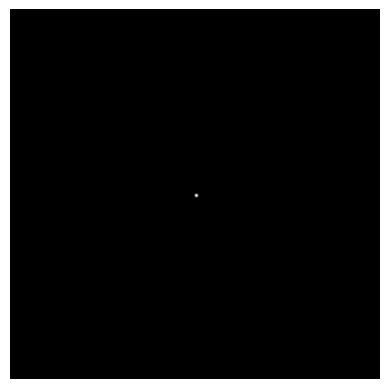


t =  0.3
variance = 
 [[ 0.28105 -0.     ]
 [-0.       0.28105]]


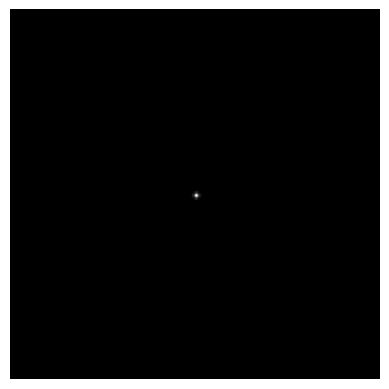


t =  1
variance = 
 [[ 1. -0.]
 [-0.  1.]]


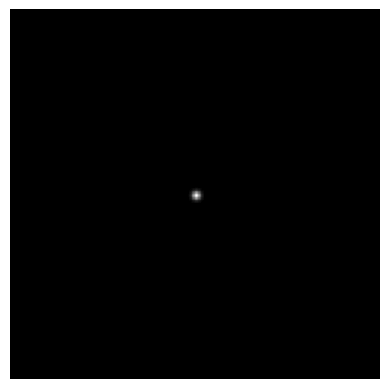


t =  10
variance = 
 [[10. -0.]
 [-0. 10.]]


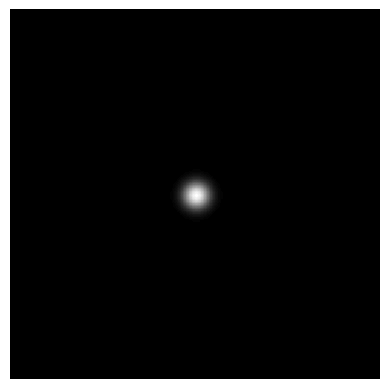


t =  100
variance = 
 [[100.  -0.]
 [ -0. 100.]]


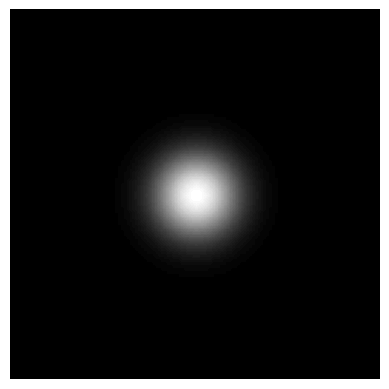

In [150]:
for i, t in enumerate((0.1,0.3,1,10,100)):
    print("t = ", t)
    psf = gaussfft(deltafcn(128, 128), t)
    # psf_given = discgaussfft(deltafcn(128, 128), t)
    var = variance(psf)
    # var_given = variance(psf_given)
    print("variance = \n", np.round(var,5))
    # print("variance given = \n", np.round(var_given,5))
    showgrey(psf)
    # showgrey(psf_given)
    print()
    

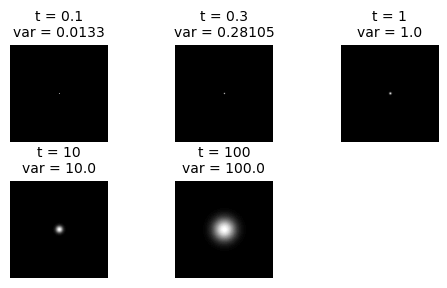

In [176]:
f = plt.figure()
f.subplots_adjust(wspace=0, hspace=0.4)
ts = (0.1,0.3,1,10,100)
axes = []
n = len(ts)
m = int(np.ceil(np.sqrt(n)))
for i, t in enumerate(ts):
    psf = gaussfft(deltafcn(128, 128), t)
    var = variance(psf)
    a = f.add_subplot(m, m, i+1)
    a.set_title('t = ' + str(t)+'\nvar = '+str(np.round(var.max(),5)))
    showgrey(psf, display=False)
    axes.append(a)